<p style="text-align:center;"><span style="font-size:50px;"><span style="color:CadetBlue;"><span style="font-family:cursive;"> Movielo recommender system ! </span> </span>  </span></p>

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Importing libraries and data</div>

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing Lense movie dataset
data_movies = pd.read_csv ("movies.csv")
data_ratings = pd.read_csv ("ratings.csv")

df_movies = pd.DataFrame (data_movies)
df_ratings = pd.DataFrame (data_ratings)

In [3]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Preproseccing and EDA</div>

In [5]:
n_ratings = len(df_ratings)
n_movies = df_ratings['movieId'].nunique()
n_users = df_ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37


There are 100836 ratings in general.
    
There are 9724 movies in general.
    
On average each user rated 165.3 times.

On average each movie has 10.37 rates.

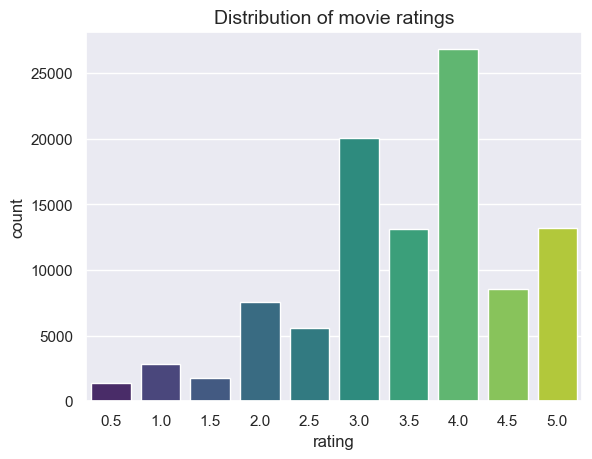

In [6]:
sns.set_theme()
sns.countplot ( x = "rating" , data = df_ratings , palette = "viridis")
plt.title ("Distribution of movie ratings" , fontsize = 14)
plt.show ()

In [7]:
print(f"Mean global rating: {round(df_ratings['rating'].mean(),2)}")

mean_ratings = df_ratings.groupby('userId')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}")

Mean global rating: 3.5
Mean rating per user: 3.66


Rating average : 3.5

Rating average per user : 3.66

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Which movies are most frequently rated?</div>

In [8]:
df_movie_ratings = df_ratings.merge (df_movies, on='movieId')
df_movie_ratings

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [9]:
df_movie_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

There is no movie without rating! 

In [10]:
df_movie_ratings ['title'].value_counts ()[0:10]

Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: title, dtype: int64

vice versa the least frequently rated?

In [11]:
df_movie_ratings ['title'].value_counts().tail()

Sex, Drugs & Taxation (2013)     1
Extraordinary Tales (2015)       1
Tomorrow (2015)                  1
Embrace of the Serpent (2016)    1
31 (2016)                        1
Name: title, dtype: int64

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">how many movies have less than 10 rating?</div>

In [12]:
df_movie_ratings

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [13]:
# A data frame which stores every movie title and its number of ratings
N_rating_for_movies = df_movie_ratings ['title'].value_counts()
N_rating_for_movies = pd.DataFrame (N_rating_for_movies).reset_index()
N_rating_for_movies.columns = ['title' , 'n_rating']

In [14]:
N_rating_for_movies

,title,n_rating
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
...,...,...
9714,"Sex, Drugs & Taxation (2013)",1
9715,Extraordinary Tales (2015),1
9716,Tomorrow (2015),1
9717,Embrace of the Serpent (2016),1


In [15]:
# The data frame which stores the movies that have less than 10 ratings
less10_rating = N_rating_for_movies [N_rating_for_movies ['n_rating'] <= 10]
less10_rating

,title,n_rating
2121,"Change-Up, The (2011)",10
2122,Predators (2010),10
2123,"Rescuers Down Under, The (1990)",10
2124,Music and Lyrics (2007),10
2125,Due Date (2010),10
...,...,...
9714,"Sex, Drugs & Taxation (2013)",1
9715,Extraordinary Tales (2015),1
9716,Tomorrow (2015),1
9717,Embrace of the Serpent (2016),1


In [16]:
# A data frame which shows count of number of rating. It means how many movies have how many number of ratings. 
N_rating_counts = N_rating_for_movies.groupby('n_rating')[['n_rating']].value_counts()

N_rating_counts = pd.DataFrame (N_rating_counts).reset_index()
N_rating_counts.columns = ['n_rating', 'count']
N_rating_counts

,n_rating,count
0,1,3441
1,2,1298
2,3,800
3,4,529
4,5,383
...,...,...
172,278,1
173,279,1
174,307,1
175,317,1


The upper data frame represents how many movies have how many number of ratings. 

for example :

There are 3441 movies which have only just 1 rating.

or there are 1298 movies which have 2 ratings, and so on ....

In [17]:
# A data frame which stores count of movies which have less than 11 ratings
less10_count = N_rating_counts [N_rating_counts ['n_rating'] <= 10]
less10_count

,n_rating,count
0,1,3441
1,2,1298
2,3,800
3,4,529
4,5,383
5,6,319
6,7,278
7,8,230
8,9,172
9,10,148


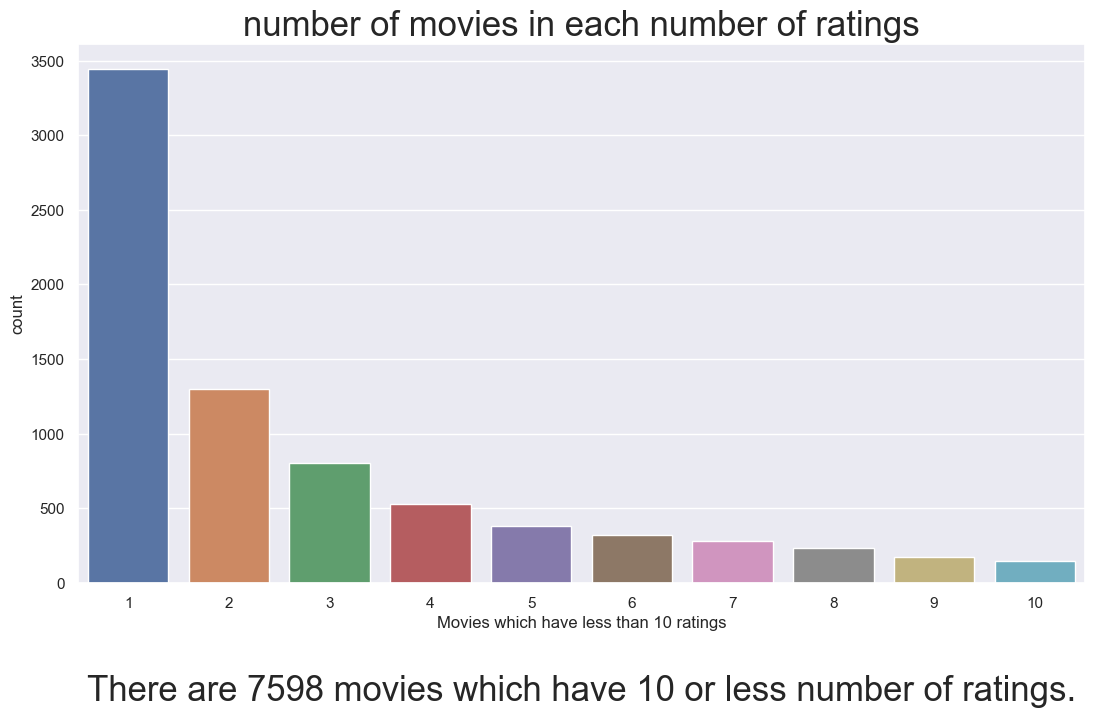

In [18]:
sum1 = 0
for i in less10_count ['count'] :
    sum1 += i


plt.figure (figsize = (13 , 7))
sns.countplot (x = less10_rating.n_rating)
plt.title ("number of movies in each number of ratings" , size = 25)
plt.xlabel ("Movies which have less than 10 ratings")

plt.annotate(f'There are {sum1} movies which have 10 or less number of ratings.',
            xy = (.5, -0.2),
            xycoords='axes fraction',
            ha='center',
            va="center",
            fontsize=25)


plt.show ()

In [19]:
N_rating_for_movies.head()

,title,n_rating
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278


Also here is the most rated movies in the dataframe  

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Which movie has the lowest and highest average rating?</div>

In [20]:
mean_ratings = df_ratings.groupby('movieId')[['rating']].mean() # ratingd average per movie
lowest_rated = mean_ratings['rating'].idxmin()  # returns the lowest average (but iy returns the movie id)
df_movies[df_movies['movieId']==lowest_rated]  # it returns the movie name instead of the id

,movieId,title,genres
2689,3604,Gypsy (1962),Musical


In [21]:
highest_rated = mean_ratings['rating'].idxmax()
df_movies[df_movies['movieId'] == highest_rated]

,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama


How many ratings does Lamerica have?

In [22]:
df_movie_ratings [df_movie_ratings ['movieId'] == highest_rated]

,userId,movieId,rating,timestamp,title,genres
86227,85,53,5.0,889468268,Lamerica (1994),Adventure|Drama
86228,603,53,5.0,963180003,Lamerica (1994),Adventure|Drama


Only 2 user rated this movie so it can't be the most popular movie. For finding the most popular movies you can apply the Bayesian Average function to data set and find the most and the least popular movies.

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Bayesian average</div>

The Bayesian average is a method to estimate the true quality of an item (in this case, a movie) by combining its observed average rating with an overall prior estimate. This helps to mitigate the impact of items with few ratings, which might have inflated or deflated ratings due to insufficient data.

Bayesian Average = (C * mean_rating + total_ratings * mean_rating) / (C + total_ratings)

C: Average number of ratings for all movies

mean_rating: Average rating of all movies

total_ratings: Total number of ratings for a specific movie

mean_rating: Mean rating for a specific movie

In [23]:
def calculate_bayesian_average(df):

  # Calculate total number of ratings and average rating for each movie
    movie_stats = df.groupby('movieId').agg({'rating': ['mean', 'count']})
    movie_stats.columns = ['mean_rating', 'total_ratings']

  # Calculate overall average rating and average number of ratings for all movies
    mean_rating = movie_stats['mean_rating'].mean()
    C = movie_stats['total_ratings'].mean()

  # Calculate Bayesian Average
    movie_stats['bayesian_average'] = (C * mean_rating + movie_stats['total_ratings'] * movie_stats['mean_rating']) / (C + movie_stats['total_ratings'])

  # Merge Bayesian Averages back to the original DataFrame
    df = pd.merge(df, movie_stats['bayesian_average'], on='movieId', how='left')

    return df

In [24]:
df_bayesian_average = calculate_bayesian_average (df_movie_ratings)
df_bayesian_average

,userId,movieId,rating,timestamp,title,genres,bayesian_average
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.890632
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.890632
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.890632
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.890632
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.890632
...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,3.195389
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,3.371294
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,3.239365
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,3.283341


In [25]:
df_bayesian_average [df_bayesian_average ['title'] == 'Lamerica (1994)']

,userId,movieId,rating,timestamp,title,genres,bayesian_average
86227,85,53,5.0,889468268,Lamerica (1994),Adventure|Drama,3.543383
86228,603,53,5.0,963180003,Lamerica (1994),Adventure|Drama,3.543383


Now you can see that Lamerica is not the most popular movie

In [26]:
df_sorted_bayesian_average = df_bayesian_average.groupby(['title' , 'bayesian_average'])[['rating']].mean()
df_sorted_bayesian_average.sort_values('bayesian_average', ascending=False)

,,rating
title,bayesian_average,
"Shawshank Redemption, The (1994)",4.392070,4.429022
"Godfather, The (1972)",4.236457,4.289062
Fight Club (1999),4.227052,4.272936
Star Wars: Episode IV - A New Hope (1977),4.192646,4.231076
"Usual Suspects, The (1995)",4.190567,4.237745
...,...,...
Superman IV: The Quest for Peace (1987),2.306841,1.687500
Anaconda (1997),2.296800,1.925926
Godzilla (1998),2.267268,1.954545


In upper dataset you can see the most and the least popular movies based on bayesian average method

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Genres</div>

In [27]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Converting the genres column's values from string to list

In [28]:
df_movies['genres'] = df_movies['genres'].apply(lambda x: x.split("|"))
df_movies

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


now genres values are a list of genres instead of strings.

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Genres frequency</div>

In [29]:
from collections import Counter

genre_frequency = Counter(g for genres in df_movies['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Drama': 4361,
         'Comedy': 3756,
         'Thriller': 1894,
         'Action': 1828,
         'Romance': 1596,
         'Adventure': 1263,
         'Crime': 1199,
         'Sci-Fi': 980,
         'Horror': 978,
         'Fantasy': 779,
         'Children': 664,
         'Animation': 611,
         'Mystery': 573,
         'Documentary': 440,
         'War': 382,
         'Musical': 334,
         'Western': 167,
         'IMAX': 158,
         'Film-Noir': 87,
         '(no genres listed)': 34})

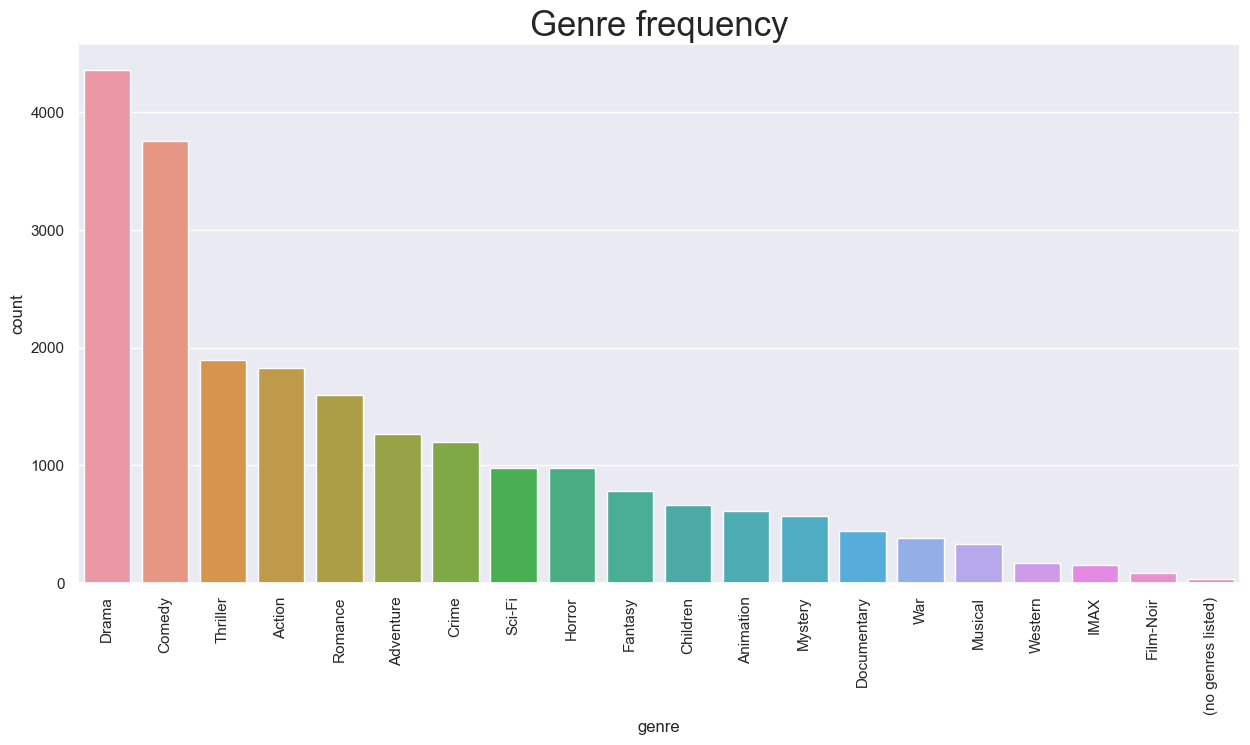

In [30]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

plt.figure (figsize = (15 , 7))
sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.title ("Genre frequency" , size = 25)
plt.xticks(rotation=90)
plt.show()

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Who are the most and the least active users??</div>

In [31]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [32]:
# A data frame which stores every movie title and its number of ratings
N_rating_by_users = df_ratings ['userId'].value_counts()
N_rating_by_users = pd.DataFrame (N_rating_by_users).reset_index()
N_rating_by_users.columns = ['userId' , 'n_rating']
N_rating_by_users

,userId,n_rating
0,414,2698
1,599,2478
2,474,2108
3,448,1864
4,274,1346
...,...,...
605,442,20
606,569,20
607,320,20
608,576,20


head of of the upper data frame represents the most active users 

and the tail of it shows the leat active users

# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Making User/Item matrix</div>

In [33]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [34]:
user_item_matrix = df_ratings.pivot(index=['userId'], columns=['movieId'], values='rating').fillna(0)
user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
user_item_matrix.loc[414]

movieId
1         4.0
2         3.0
3         4.0
4         0.0
5         2.0
         ... 
193581    0.0
193583    0.0
193585    0.0
193587    0.0
193609    0.0
Name: 414, Length: 9724, dtype: float64

In [36]:
df_ratings [df_ratings ['userId'] == 414]

,userId,movieId,rating,timestamp
62294,414,1,4.0,961438127
62295,414,2,3.0,961594981
62296,414,3,4.0,961439278
62297,414,5,2.0,961437647
62298,414,6,3.0,961515642
...,...,...,...,...
64987,414,180045,4.0,1515207301
64988,414,180497,4.0,1525548614
64989,414,180985,3.5,1527978072
64990,414,184791,2.5,1519592410


# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Making a matrix without noises</div>

In [37]:
no_user_voted = df_ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = df_ratings.groupby('userId')['rating'].agg('count')

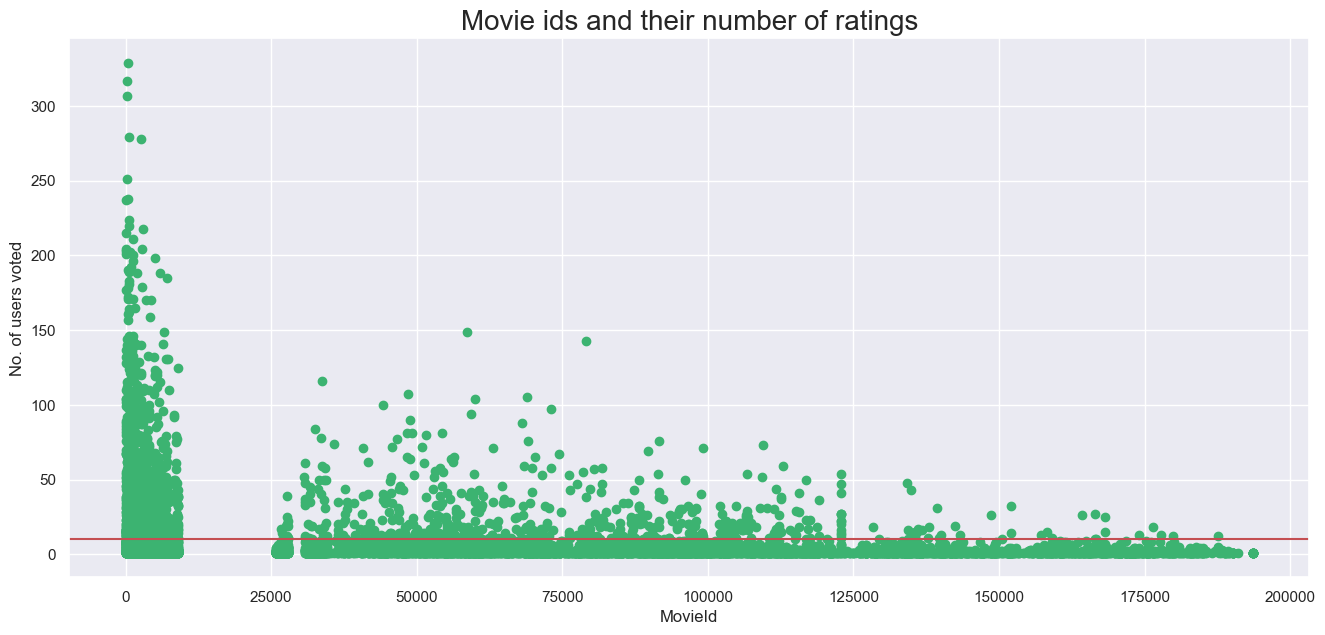

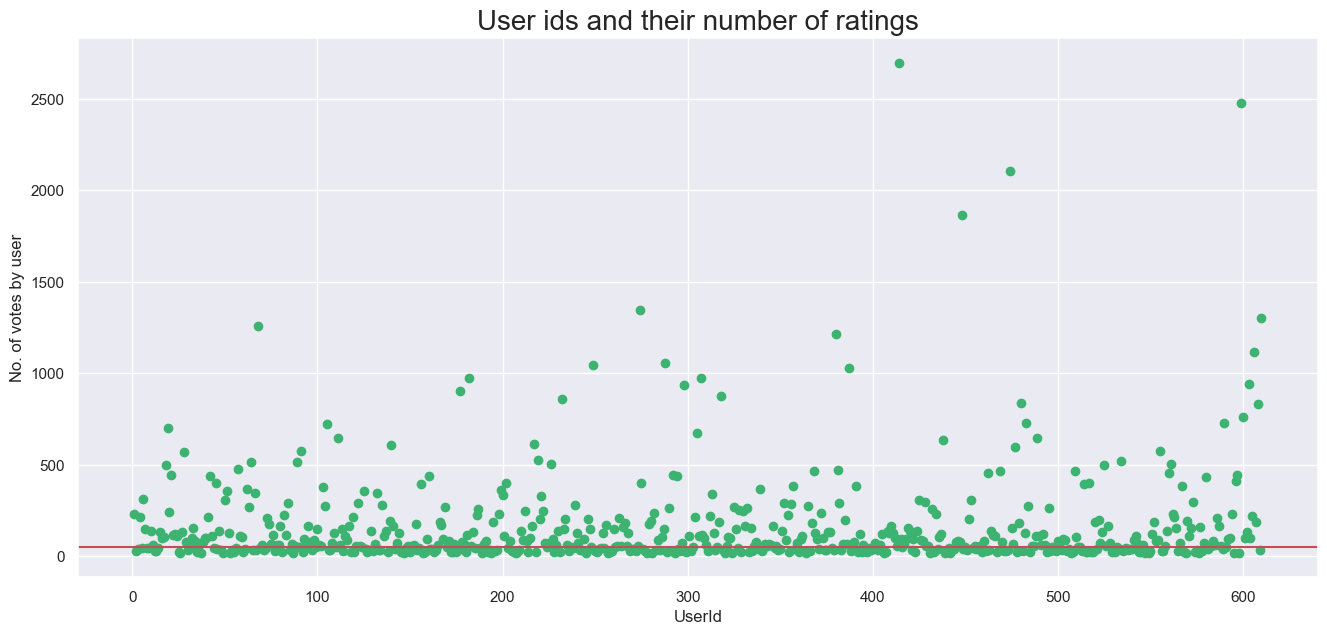

In [38]:
plt.subplots(figsize=(16,7))
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.title ("Movie ids and their number of ratings" , size = 20)
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

plt.subplots(figsize=(16,7))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.title ("User ids and their number of ratings" , size = 20)
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

I consider users which rated less than 50 movies and movies that have less than 10 ratings as noises.

In [59]:
user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df_no_noises = user_item_matrix.copy()
df_no_noises = df_no_noises.loc[no_movies_voted[no_movies_voted > 50].index , :]
df_no_noises

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,5.0,3.0,5.0,4.0,4.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,4.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df_no_noises = df_no_noises.loc[: , no_user_voted[no_user_voted > 10].index]
df_no_noises

movieId,1,2,3,5,6,7,9,10,11,12,...,159093,164179,166528,168250,168252,174055,176371,177765,179819,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,5.0,5.0,4.0,4.0,0.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,4.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,2.5,0.0,0.0,0.0,0.0,2.5,0.0,0.0,2.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# <div style="padding: 10px; background-color:#cac9cf; margin: 0; color:#7d5eb5 ; font-family: Gill Sans, serif; font-size: 120%; text-align: center; border-radius: 50% 20% / 10% 40%;; overflow: hidden; font-weight: 500;">Sparsity issue</div>

Sparsity is calculated as the ratio of the number of zero elements to the total number of elements in the matrix.


Sparsity = Number of Zeroes / Total Number of Elements

In [45]:
def calculate_sparsity(matrix):
    num_zeros = np.count_nonzero(matrix == 0)
    num_elements = matrix.shape[0] * matrix.shape[1]
    sparsity = num_zeros / num_elements
    return sparsity

In [57]:
# sparsity of complete data
calculate_sparsity (user_item_matrix)

0.9830003169443864

In [58]:
# sparsity of matrix without noises
calculate_sparsity (df_no_noises)

0.9090812709388852

another way of calculating sparsity

In [52]:
df10 = df_no_noises.copy()

In [55]:
# complete data
sparsity = 1.0 - ( np.count_nonzero(user_item_matrix) / float(user_item_matrix.size) )
print(sparsity)

0.9830003169443864


In [56]:
# no noise
sparsity = 1.0 - ( np.count_nonzero(df10) / float(df10.size) )
print(sparsity)

0.9090812709388852


Results ??

The output of the code is a decimal value between 0 and 1.

0: Indicates a completely dense matrix (no missing values).

1: Indicates a completely sparse matrix (all values are zero).

High sparsity (close to 1):

Commonly found in recommendation systems.


What is considered high sparsity?

A sparsity value of 0.95 or higher is commonly observed in movie recommendation systems. This indicates that 95% or more of the user-item matrix is empty.

Why high sparsity is common:

Large number of users and movies: This leads to a massive matrix with mostly empty cells.
User behavior: Most users watch a relatively small number of movies compared to the total available.
Cold start problem: New users or new movies have limited data, exacerbating sparsity.

In conclusion, a high sparsity value in a movie recommendation system is normal and expected.